In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import problems

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing
from sklearn.neighbors.classification import KNeighborsClassifier

from keras import models, layers
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

C:\Users\amirh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
data = pd.read_csv('GooglePlayData/googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
data.groupby('Category')['App'].count()

Category
1.9                       1
ART_AND_DESIGN           65
AUTO_AND_VEHICLES        85
BEAUTY                   53
BOOKS_AND_REFERENCE     231
BUSINESS                460
COMICS                   60
COMMUNICATION           387
DATING                  234
EDUCATION               156
ENTERTAINMENT           149
EVENTS                   64
FAMILY                 1972
FINANCE                 366
FOOD_AND_DRINK          127
GAME                   1144
HEALTH_AND_FITNESS      341
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
LIFESTYLE               382
MAPS_AND_NAVIGATION     137
MEDICAL                 463
NEWS_AND_MAGAZINES      283
PARENTING                60
PERSONALIZATION         392
PHOTOGRAPHY             335
PRODUCTIVITY            424
SHOPPING                260
SOCIAL                  295
SPORTS                  384
TOOLS                   843
TRAVEL_AND_LOCAL        258
VIDEO_PLAYERS           175
WEATHER                  82
Name: App, dtype: int64

In [5]:
#Create My new Data

games = data[data['Category'] == 'GAME']
games.reset_index(drop=True, inplace=True)
games.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1,Subway Surfers,GAME,4.5,27722264,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
2,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
3,Solitaire,GAME,4.7,254258,23M,"10,000,000+",Free,0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up
4,Bubble Shooter,GAME,4.5,148897,46M,"10,000,000+",Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up


In [6]:
games.groupby('Genres')['App'].count()

Genres
Action                           365
Action;Action & Adventure          3
Adventure                         75
Adventure;Action & Adventure       5
Arcade                           220
Board                             44
Card                              48
Casino                            39
Casual                            45
Casual;Action & Adventure          1
Casual;Brain Games                 1
Casual;Creativity                  1
Casual;Pretend Play                1
Music                             22
Puzzle                            42
Racing                            98
Role Playing                      16
Simulation                        11
Simulation;Action & Adventure      1
Simulation;Education               1
Sports                            14
Strategy                          24
Trivia                            38
Word                              29
Name: App, dtype: int64

In [7]:
genre_remove = [
'Action;Action & Adventure',
'Adventure;Action & Adventure',
'Casual;Action & Adventure',
'Casual;Brain Games',
'Casual;Creativity',
'Casual;Pretend Play',
'Simulation;Action & Adventure',
'Simulation;Education']

for i in genre_remove:
    games = games[games.Genres != i]
    
games.reset_index(drop=True, inplace=True)

In [8]:
games.groupby('Genres')['App'].count()

Genres
Action          365
Adventure        75
Arcade          220
Board            44
Card             48
Casino           39
Casual           45
Music            22
Puzzle           42
Racing           98
Role Playing     16
Simulation       11
Sports           14
Strategy         24
Trivia           38
Word             29
Name: App, dtype: int64

In [9]:
games = games[['App', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Content Rating', 'Genres']]
#games.set_index('App')

In [10]:
games.head()

,App,Rating,Reviews,Size,Installs,Type,Content Rating,Genres
0,Subway Surfers,4.5,27722264,76M,"1,000,000,000+",Free,Everyone 10+,Arcade
1,Candy Crush Saga,4.4,22426677,74M,"500,000,000+",Free,Everyone,Casual
2,Solitaire,4.7,254258,23M,"10,000,000+",Free,Everyone,Card
3,Bubble Shooter,4.5,148897,46M,"10,000,000+",Free,Everyone,Casual
4,slither.io,4.4,5234162,Varies with device,"100,000,000+",Free,Everyone,Action


In [11]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130 entries, 0 to 1129
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1130 non-null   object 
 1   Rating          1083 non-null   float64
 2   Reviews         1130 non-null   object 
 3   Size            1130 non-null   object 
 4   Installs        1130 non-null   object 
 5   Type            1130 non-null   object 
 6   Content Rating  1130 non-null   object 
 7   Genres          1130 non-null   object 
dtypes: float64(1), object(7)
memory usage: 70.8+ KB


In [12]:
games.isnull().sum()

App                0
Rating            47
Reviews            0
Size               0
Installs           0
Type               0
Content Rating     0
Genres             0
dtype: int64

In [13]:
#PreProcessing

# drop NULLs
games.dropna(inplace=True)
games.isnull().sum()

App               0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Content Rating    0
Genres            0
dtype: int64

In [14]:
# converting data to numeric

# for Reviws coulmn
games[['Reviews']] = games[['Reviews']].apply(pd.to_numeric, errors='coerce')
# for Size column
problems.preProcess_new_Size(games)
# for Install column
problems.preProcess_new_Installs(games)

In [15]:
games.head()

,App,Rating,Reviews,Size,Installs,Type,Content Rating,Genres
0,Subway Surfers,4.5,27722264,76.0,1000000000,Free,Everyone 10+,Arcade
1,Candy Crush Saga,4.4,22426677,74.0,500000000,Free,Everyone,Casual
2,Solitaire,4.7,254258,23.0,10000000,Free,Everyone,Card
3,Bubble Shooter,4.5,148897,46.0,10000000,Free,Everyone,Casual
5,Clash Royale,4.6,23133508,97.0,100000000,Free,Everyone 10+,Strategy


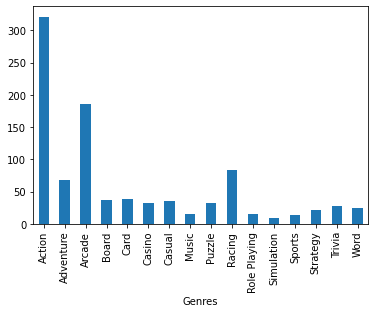

In [16]:
# Exploratory Data Analaysis

games.groupby('Genres')['App'].count().plot(kind='bar')

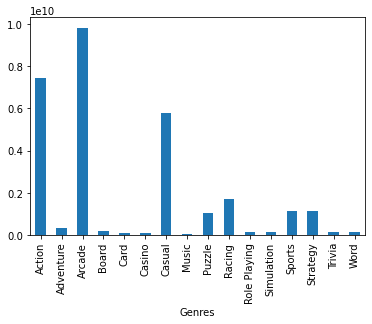

In [17]:
games.groupby('Genres')['Installs'].sum().plot(kind='bar')

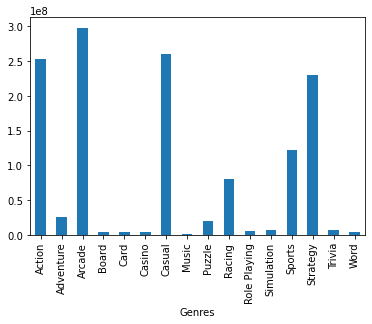

In [18]:
games.groupby('Genres')['Reviews'].sum().plot(kind='bar')

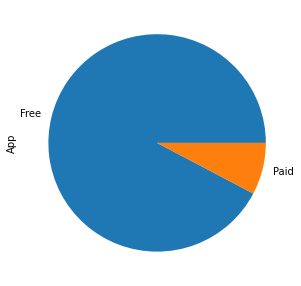

In [19]:
games.groupby('Type')['App'].count().plot(kind='pie', figsize=(5,5))

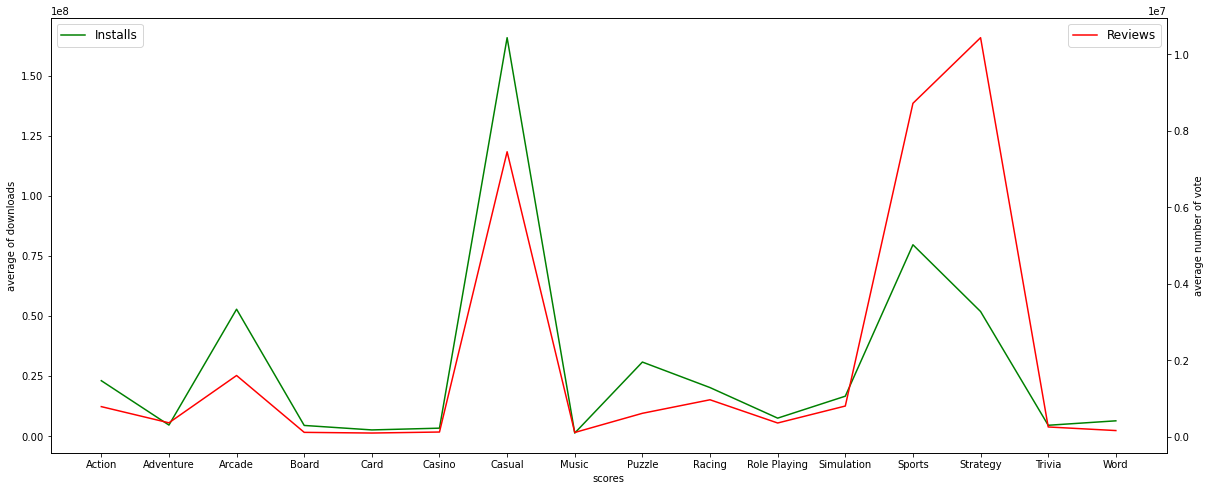

In [20]:
fig, ax = plt.subplots(figsize=(20, 8))

fig1 = sns.lineplot(x='Genres', y='Installs', data=games, ax=ax, ci=None, color='g',label='Installs')
fig1.set(xlabel='scores', ylabel='average of downloads')

ax2 = ax.twinx()
fig2 = sns.lineplot(x='Genres', y='Reviews', data=games, ax=ax2, ci=None, color='r',label='Reviews')
fig2.set(xlabel='scores', ylabel='average number of vote')

ax.legend(loc='upper left', fontsize='large')
ax2.legend(fontsize='large')

plt.show()

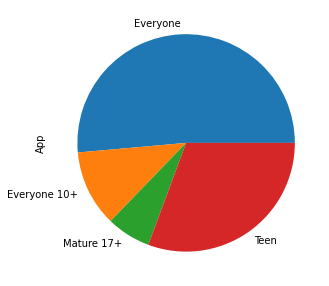

In [21]:
games.groupby('Content Rating')['App'].count().plot(kind='pie', figsize=(5,5))

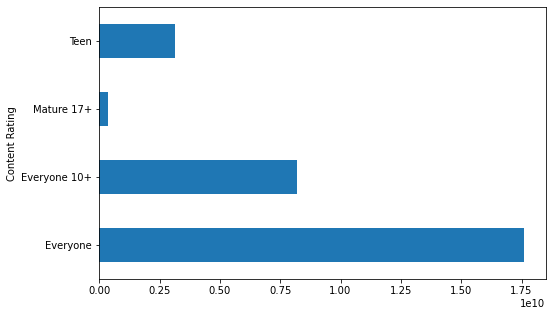

In [22]:
games.groupby('Content Rating')['Installs'].sum().plot(kind='barh', figsize=(8,5))

In [23]:
games = games.sort_values('Size', ascending=False)
r_labels = ['Tiny', 'Small', 'Normal', 'Large', 'Huge']
games['groups'] = pd.qcut(games.loc[:,'Size'], q = 5, labels = r_labels)

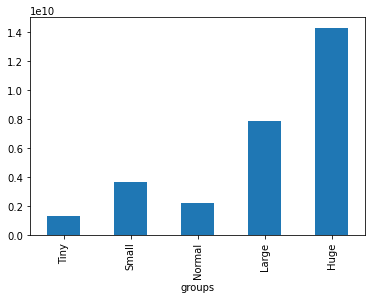

In [24]:
games.groupby('groups')['Installs'].sum().plot(kind='bar')
games.drop('groups', axis=1, inplace=True)

In [25]:
# One Hot Encode

# Get one hot encoding of columns Type and Content Rating
one_hot = pd.get_dummies(games[['Type', 'Content Rating']])
# Drop columns Type and Content Ratings as it is now encoded
games = games.drop(['Type', 'Content Rating'], axis = 1)
# Join the encoded games
games = games.join(one_hot)
games  

,App,Rating,Reviews,Size,Installs,Genres,Type_Free,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen
322,Hungry Shark Evolution,4.5,6074627,100.0,100000000,Arcade,1,0,0,0,0,1
961,Stickman Legends: Shadow Wars,4.4,38419,100.0,1000000,Action,0,1,0,1,0,0
889,Car Crash III Beam DH Real Damage Simulator 2018,3.6,151,100.0,10000,Racing,1,0,1,0,0,0
134,Mini Golf King - Multiplayer Game,4.5,531458,100.0,5000000,Sports,1,0,1,0,0,0
99,Hungry Shark Evolution,4.5,6074334,100.0,100000000,Arcade,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
740,BW-Go Free,4.6,547,1.3,10000,Board,1,0,1,0,0,0
743,BW-GnuGo,4.1,64,1.3,5000,Board,1,0,1,0,0,0
739,BW-Go,4.8,265,1.3,1000,Board,0,1,1,0,0,0
725,BombSquad Remote,4.1,13304,1.3,1000000,Arcade,1,0,1,0,0,0


In [26]:
X_train, X_test, y_train, y_test = train_test_split(games[games.columns.difference(['Genres', 'App'])], games.loc[:,'Genres'], random_state=0)

In [27]:
# normalization 

#MinMax Scaler
scaler = MinMaxScaler(feature_range=(0, 1))
MMscaler = scaler.fit(X_train)
X_train = MMscaler.transform(X_train)

X_train

array([[0.        , 1.        , 0.        , ..., 0.75733064, 1.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.29221436, 1.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.5247725 , 1.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.29221436, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.3528817 , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.24165824, 1.        ,
        0.        ]])

In [28]:
#Standard Scaler
scaler = StandardScaler()
Sscaler = scaler.fit(X_train)
X_train = Sscaler.transform(X_train)

X_train

array([[-1.01541787,  2.73108468, -0.26746032, ...,  1.07516973,
         0.29343265, -0.29343265],
       [ 0.98481623, -0.36615489, -0.26746032, ..., -0.56850882,
         0.29343265, -0.29343265],
       [ 0.98481623, -0.36615489, -0.26746032, ...,  0.25333045,
         0.29343265, -0.29343265],
       ...,
       [-1.01541787,  2.73108468, -0.26746032, ..., -0.56850882,
         0.29343265, -0.29343265],
       [-1.01541787, -0.36615489, -0.26746032, ..., -0.35411597,
         0.29343265, -0.29343265],
       [-1.01541787, -0.36615489, -0.26746032, ..., -0.74716953,
         0.29343265, -0.29343265]])

In [29]:
#Normlaizer
norm = Normalizer()
Normalizer = norm.fit(X_train)
X_train = Normalizer.transform(X_train)

X_train

array([[-0.31289644,  0.84157144, -0.08241669, ...,  0.33130871,
         0.09041995, -0.09041995],
       [ 0.64717555, -0.24062001, -0.17576252, ..., -0.37359763,
         0.19283033, -0.19283033],
       [ 0.64032689, -0.23807368, -0.17390253, ...,  0.1647153 ,
         0.19078972, -0.19078972],
       ...,
       [-0.32447716,  0.87271912, -0.08546704, ..., -0.1816672 ,
         0.09376651, -0.09376651],
       [-0.49493936, -0.17847279, -0.13036666, ..., -0.17260473,
         0.14302621, -0.14302621],
       [-0.42351549, -0.15271769, -0.11155367, ..., -0.31163315,
         0.12238634, -0.12238634]])

In [30]:
#injection to Machine learning algoritms

#Preparation of test data
X_test = MMscaler.transform(X_test)
X_test = Sscaler.transform(X_test)
X_test = Normalizer.transform(X_test)

X_test

array([[ 0.45979641, -0.1709524 , -0.12487334, ..., -0.6357871 ,
         0.13699945, -0.13699945],
       [ 0.19472606, -0.07239919, -0.05288448, ..., -0.04175773,
        -0.67384566,  0.67384566],
       [-0.22753419, -0.08204776,  0.83780416, ...,  0.42508058,
         0.0657522 , -0.0657522 ],
       ...,
       [-0.48668912, -0.1754978 , -0.12819356, ...,  0.24130587,
         0.14064208, -0.14064208],
       [-0.30637523,  0.82403189, -0.08069901, ...,  0.16268546,
         0.08853547, -0.08853547],
       [ 0.37948039, -0.14109089, -0.1030608 , ...,  0.68967057,
         0.11306874, -0.11306874]])

In [31]:
# simple classification 
# Machine Learning

knn = KNeighborsClassifier(n_neighbors=63, p=1, weights="distance")
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
print('knn score: ' + str(score))

knn score: 0.48333333333333334
